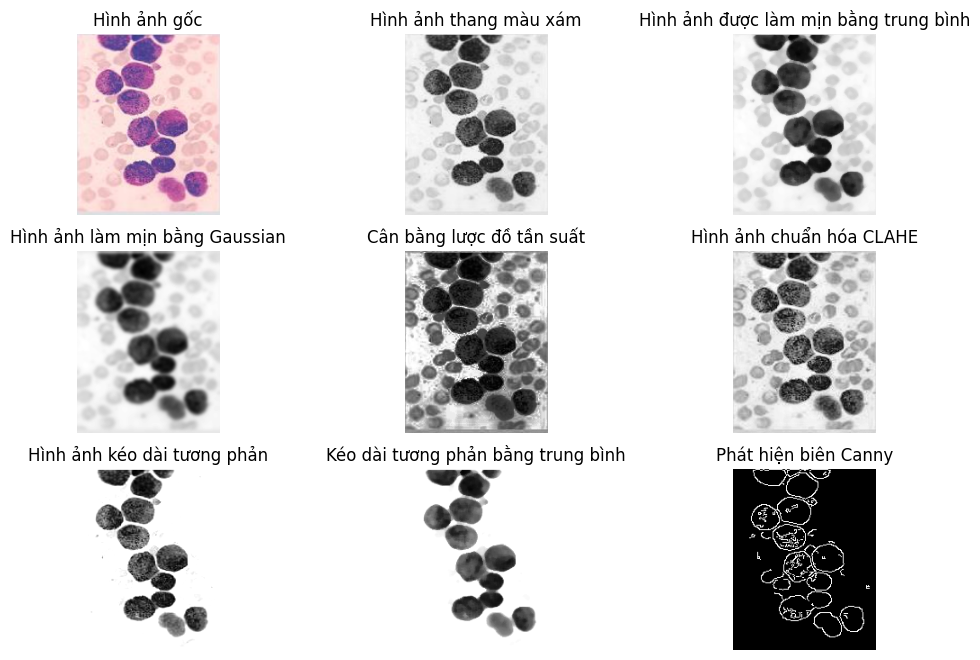

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Đọc hình ảnh gốc
image = cv2.imread("c120.png")

# Chuyển đổi thành hình ảnh thang màu xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png', gray)

# Áp dụng bộ lọc trung bình để làm mịn hình ảnh
blurM = cv2.medianBlur(gray, 5)
cv2.imwrite('blurM.png', blurM)

# Áp dụng bộ lọc Gaussian để làm mịn hình ảnh
blurG = cv2.GaussianBlur(gray, (9, 9), 0)
cv2.imwrite('blurG.png', blurG)

# Cân bằng lược đồ tần suất
histoNorm = cv2.equalizeHist(gray)
cv2.imwrite('histoNorm.png', histoNorm)

# Tạo đối tượng CLAHE cho Cân bằng Lược đồ tần suất Tích hợp Hạn chế (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(gray)
cv2.imwrite('claheNorm.png', claheNorm)

# Kéo dài tương phản
# Hàm để ánh xạ từng cấp độ cường độ thành cấp độ cường độ đầu ra
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

# Định nghĩa các tham số
r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vector hóa hàm để áp dụng nó cho mỗi giá trị trong mảng Numpy
pixelVal_vec = np.vectorize(pixelVal)

# Áp dụng kéo dài tương phản
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

cv2.imwrite('contrast_stretch.png', contrast_stretched)
cv2.imwrite('contrast_stretch_blurM.png', contrast_stretched_blurM)

# Phát hiện biên bằng bộ lọc biên Canny
edge = cv2.Canny(gray, 100, 200)
cv2.imwrite('edge.png', edge)

edgeG = cv2.Canny(blurG, 100, 200)
cv2.imwrite('edgeG.png', edgeG)

edgeM = cv2.Canny(blurM, 100, 200)
cv2.imwrite('edgeM.png', edgeM)

# Hiển thị các hình ảnh bằng plt
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Hình ảnh gốc")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Hình ảnh thang màu xám")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(blurM, cmap='gray')
plt.title("Hình ảnh được làm mịn bằng trung bình")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(blurG, cmap='gray')
plt.title("Hình ảnh làm mịn bằng Gaussian")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(histoNorm, cmap='gray')
plt.title("Cân bằng lược đồ tần suất")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(claheNorm, cmap='gray')
plt.title("Hình ảnh chuẩn hóa CLAHE")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Hình ảnh kéo dài tương phản")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(contrast_stretched_blurM, cmap='gray')
plt.title("Kéo dài tương phản bằng trung bình")
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(edge, cmap='gray')
plt.title("Phát hiện biên Canny")
plt.axis('off')

plt.show()


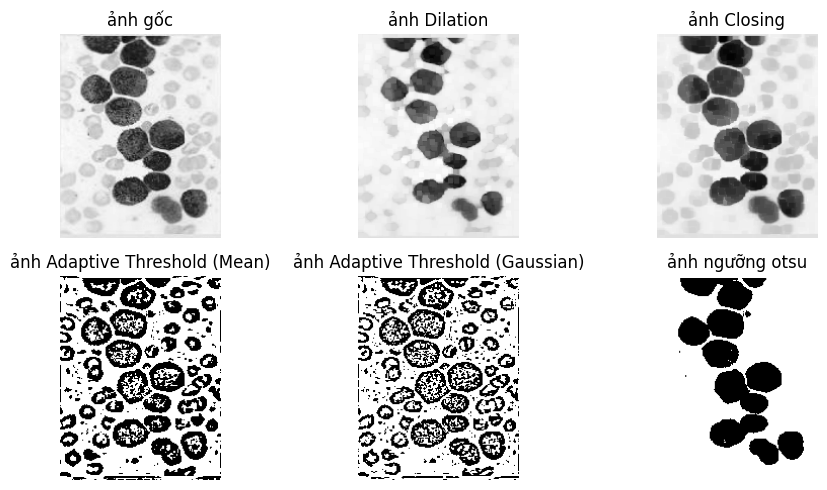

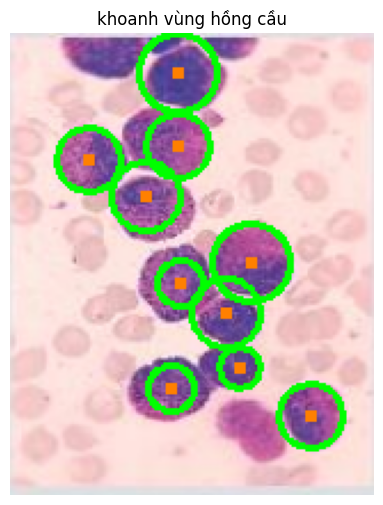

Số lượng đường tròn: 10
Tổng bán kính: 135
Tọa độ X của các đường tròn: [105, 34, 131, 73, 59, 73, 94, 74, 70, 100]
Tọa độ Y của các đường tròn: [100, 55, 167, 49, 71, 17, 122, 109, 155, 146]


In [4]:
# Đọc hình ảnh đã được cải tiến
img = cv2.imread('c120.png', 0)

# Hiển thị hình ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title('ảnh gốc')
plt.axis('off')

# Thực hiện phép biến đổi dilation
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)

# Hiển thị hình ảnh sau dilation
plt.subplot(232)
plt.imshow(dilation, cmap='gray')
plt.title('ảnh Dilation')
plt.axis('off')

# Thực hiện phép biến đổi closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Hiển thị hình ảnh sau closing
plt.subplot(233)
plt.imshow(closing, cmap='gray')
plt.title('ảnh Closing')
plt.axis('off')

# Áp dụng ngưỡng th adapt trên bộ lọc trung bình và Gauss
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Hiển thị hình ảnh sau adaptive thresholding
plt.subplot(234)
plt.imshow(th2, cmap='gray')
plt.title('ảnh Adaptive Threshold (Mean)')
plt.axis('off')

plt.subplot(235)
plt.imshow(th3, cmap='gray')
plt.title('ảnh Adaptive Threshold (Gaussian)')
plt.axis('off')

# Ngưỡng Otsu
ret4, th4 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Hiển thị hình ảnh sau ngưỡng Otsu
plt.subplot(236)
plt.imshow(th4, cmap='gray')
plt.title('ảnh ngưỡng otsu')
plt.axis('off')

# Hiển thị toàn bộ biến đổi
plt.tight_layout()
plt.show()

# Khởi tạo các danh sách
Cell_count, x_count, y_count = [], [], []

# Đọc hình ảnh gốc để hiển thị đường tròn và vị trí trung tâm
display = cv2.imread("c120.png")

# Biến đổi Hough với tham số vòng tròn được điều chỉnh
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 20, param1=80, param2=28, minRadius=5, maxRadius=20)

# Phát hiện và đánh dấu các đường tròn sử dụng biến đổi Hough
if circles is not None:
    # Chuyển đổi tọa độ (x, y) và bán kính của các đường tròn thành số nguyên
    circles = np.round(circles[0, :]).astype("int")

    # Duyệt qua các tọa độ (x, y) và bán kính của các đường tròn
    for (x, y, r) in circles:
        cv2.circle(display, (x, y), r, (0, 255, 0), 2)
        cv2.rectangle(display, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)
        Cell_count.append(r)
        x_count.append(x)
        y_count.append(y)

    # Hiển thị hình ảnh kết quả
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
    plt.title("khoanh vùng hồng cầu")
    plt.axis('off')
    plt.show()

# Hiển thị số lượng đường tròn
print(f"Số lượng đường tròn: {len(Cell_count)}")
# Tổng bán kính
print(f"Tổng bán kính: {sum(Cell_count)}")
# Tọa độ X của các đường tròn
print(f"Tọa độ X của các đường tròn: {x_count}")
# Tọa độ Y của các đường tròn
print(f"Tọa độ Y của các đường tròn: {y_count}")
